In [1]:
%matplotlib inline
    
from numpy import nan
from pandas import (DataFrame, date_range)
import matplotlib.pyplot as plt

from alphalens.tears import (create_returns_tear_sheet,
                      create_information_tear_sheet,
                      create_turnover_tear_sheet,
                      create_summary_tear_sheet,
                      create_full_tear_sheet,
                      create_event_returns_tear_sheet,
                      create_event_study_tear_sheet)

from alphalens.utils import get_clean_factor_and_forward_returns

In [2]:
%%time
# with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
#     print(tr.iloc[-1].sort_values(ascending=False))
#     print(tr.iloc[-1])
import QUANTAXIS as QA
from QUANTAXIS.QAAnalysis.QAAnalysis_finance import QAAnalysis_finance
from QUANTAXIS.QASetting.QALocalize import analysis_path
import tools.Sample_Tools as smpl
import tools.QAAdapter as qaadapter
from base.Constants import trade_date_sse
import os

block_name = '通信设备'
block_name = '旅游景点'
block_name = '影视音像'
block_name = '电器仪表'
block_name = '软件服务'

gap = 90
end = '2023-06-21'
start = trade_date_sse[trade_date_sse.index(end)-gap]

# a  = qaadapter.QA_adapter_get_code_from_block('sw_l2', '水泥')
stock_list  = qaadapter.QA_adapter_get_code_from_block('sw_l1', '国防军工')

print(smpl.get_stock_name(stock_list), len(stock_list))




jqdatasdk not installed
you are using non-interactive mdoel quantaxis
code
000519     中兵红箭
000547     航天发展
000561     烽火电子
000576     甘化科工
000697    *ST炼石
          ...  
603261     立航科技
603267     鸿远电子
603678     火炬电子
603712      七一二
605123     派克新材
Name: name, Length: 62, dtype: object 62
CPU times: user 411 ms, sys: 60.3 ms, total: 471 ms
Wall time: 609 ms


In [ ]:
    # from qaenv import (clickhouse_ip, clickhouse_password, clickhouse_port,
    #                   clickhouse_user)

    # fun_name = 'alpha101_'+str(1)
    # print(fun_name)
    # factor_base = alpha101(fun_name, host=clickhouse_ip, port=clickhouse_port, user=clickhouse_user, password=clickhouse_password)
    # factor_base.update_to_database(df)

In [3]:
from ind.Alpha101 import *

data = QA.QA_fetch_stock_day_adv(stock_list, start, end)
# data.data.index = data.data.index.map(lambda x: (x[0].tz_localize('UTC'), x[1]))
# data.data.index.names = ['tz', 'code']
cur_ret = smpl.get_current_return(data,'close')
prices = data.data['close']

factor = alpha1(prices, cur_ret)
factor = factor.replace([-np.inf, np.inf], 0).fillna(value=0)

prices = prices.unstack()

# formater = '%Y%m%d' # '%Y%m%d %H%M%S'
# index_ = [pd.to_datetime(x).strftime(formater) for x in inds_.index.values]
# factor = alpha9(price)
print(factor.tail(10))
print(prices.tail(10))
# print(data.data['close'].tail(10))


date        code  
2023-06-21  600990   -0.380999
            601606   -0.161085
            601698    0.396580
            601890    0.205766
            601989    0.029191
            603261    0.396580
            603267    0.396580
            603678    0.205766
            603712    0.029191
            605123   -0.161085
Name: close, dtype: float64
code        000519  000547  000561  000576  000697  000733  000738  000768  \
date                                                                         
2023-06-08   17.59    9.56    9.71   10.31    6.36   82.78   22.20   23.50   
2023-06-09   17.20    9.63    9.67   10.44    6.36   83.47   22.50   23.72   
2023-06-12   17.56    9.61    9.87   10.80    6.29   81.64   22.47   23.40   
2023-06-13   17.61    9.68   10.17   10.92    6.31   82.01   22.45   23.33   
2023-06-14   17.47    9.62   10.18   10.92    6.42   81.75   22.30   23.00   
2023-06-15   17.73    9.60   10.40   10.58    6.35   84.30   22.87   23.46   
2023-06-16   17.92 

In [4]:

factor_data = get_clean_factor_and_forward_returns(
    factor,
    prices,
    # groupby=factor_groups,
    quantiles=4,
    periods=(1, 5, 10), 
    filter_zscore=None,
    max_loss=0.5)

Dropped 37.4% entries from factor data: 11.0% in forward returns computation and 26.3% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 50.0%, not exceeded: OK!


/home/disk1/quanttopian/alphalens/alphalens/utils.py:159: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(index=x.index)
/home/disk1/quanttopian/alphalens/alphalens/utils.py:166: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  factor_quantile = factor_data.groupby(grouper)['factor'] \


In [6]:
factor_data.tail(10)

1D        5D       10D    factor  factor_quantile
date       asset                                                          
2023-06-07 600990 -0.006279  0.005288  0.053206  0.397506              4.0
           601606 -0.010638 -0.012158  0.021277  0.208083              3.0
           601698 -0.014229  0.022197  0.112692  0.033224              2.0
           601890  0.000973  0.002918  0.064202 -0.157200              1.0
           601989  0.008869 -0.006652  0.046563 -0.379756              1.0
           603261 -0.025015 -0.005796  0.028676  0.397506              4.0
           603267 -0.030330 -0.049308  0.145442  0.208083              3.0
           603678 -0.017268 -0.056829  0.071586  0.033224              2.0
           603712 -0.043068 -0.163156 -0.116316 -0.157200              1.0
           605123 -0.008087 -0.028253  0.052923 -0.379756              1.0

Quantiles Statistics


min       max      mean       std  count    count %
factor_quantile                                                          
1.0             -0.380999 -0.161085 -0.276379  0.109865   1463  41.456503
2.0             -0.161085  0.029191  0.018560  0.043332    676  19.155568
3.0              0.029191  0.205766  0.202783  0.022776    651  18.447152
4.0              0.396580  0.396580  0.396580  0.000000    739  20.940776

Returns Analysis


/home/disk1/quanttopian/alphalens/alphalens/performance.py:199: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  weights = factor_data.groupby(grouper)['factor'] \
/home/disk1/quanttopian/alphalens/alphalens/plotting.py:138: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  returns_table = returns_table.append(alpha_beta)


1D      5D     10D
Ann. alpha                                     -0.204  -0.165  -0.142
beta                                            0.037  -0.052  -0.001
Mean Period Wise Return Top Quantile (bps)    -32.709 -23.905 -16.084
Mean Period Wise Return Bottom Quantile (bps) -18.633 -12.340  -5.644
Mean Period Wise Spread (bps)                 -14.076 -11.395 -10.507

/home/disk1/quanttopian/alphalens/alphalens/plotting.py:810: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.axhline(1.0, linestyle='-', color='black', lw=1)
/home/disk1/quanttopian/alphalens/alphalens/plotting.py:502: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (i, a), (name, fr_column) in zip(enumerate(ax),


<Figure size 640x480 with 0 Axes>

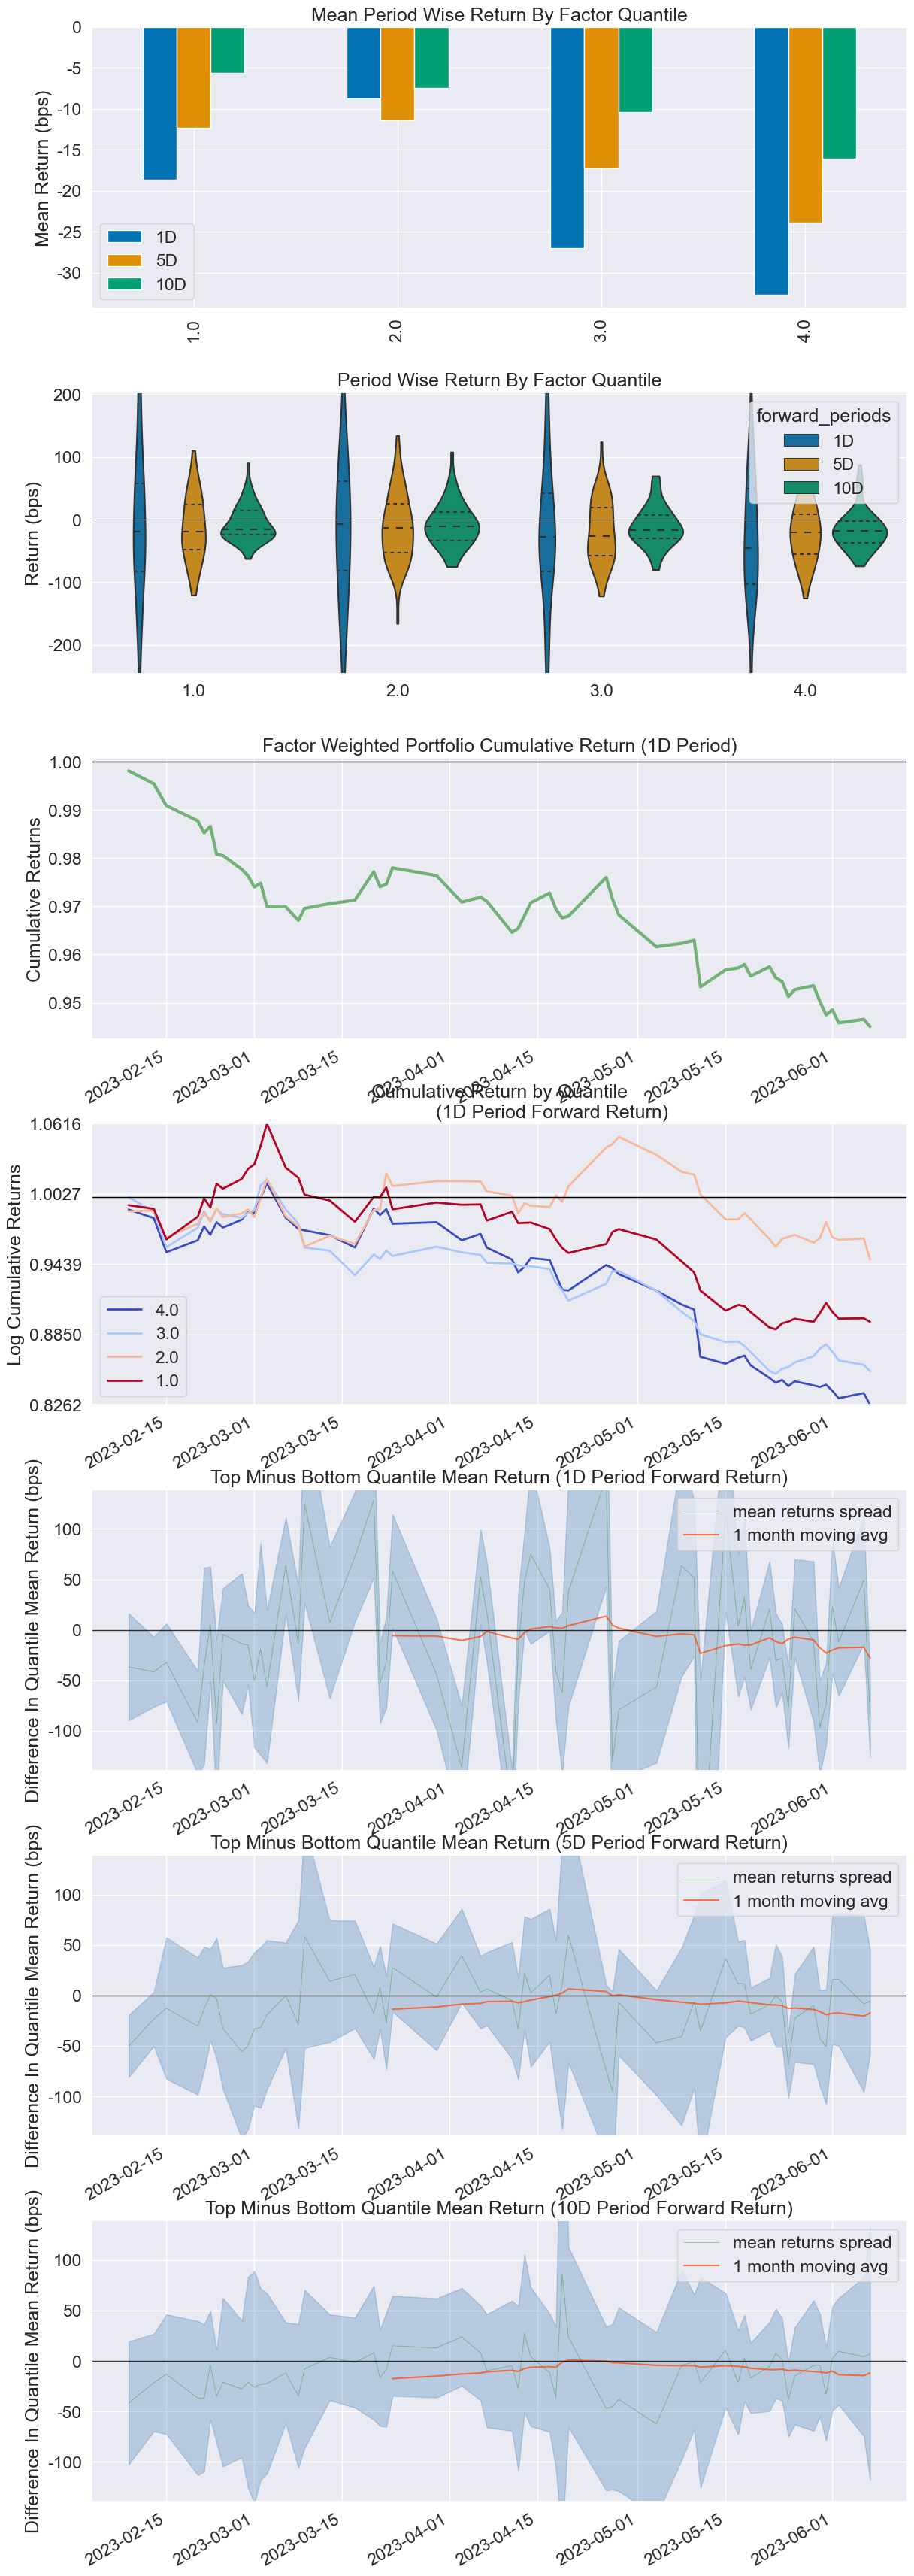

Information Analysis


1D     5D    10D
IC Mean          -0.058 -0.064 -0.077
IC Std.           0.138  0.143  0.132
Risk-Adjusted IC -0.421 -0.447 -0.583
t-stat(IC)       -3.176 -3.372 -4.402
p-value(IC)       0.002  0.001  0.000
IC Skew          -0.457 -0.563  0.068
IC Kurtosis       0.007  0.221 -0.214

/home/disk1/quanttopian/alphalens/alphalens/plotting.py:217: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for a, (period_num, ic) in zip(ax, ic.iteritems()):
/home/disk1/quanttopian/alphalens/alphalens/plotting.py:275: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for a, (period_num, ic) in zip(ax, ic.iteritems()):
/home/disk1/quanttopian/alphalens/alphalens/plotting.py:276: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ic.replace(np.nan, 0.), norm_hist=True, ax=a)
/home/disk1/quanttopian/alphalens/alphalens/plotting.py:276: User

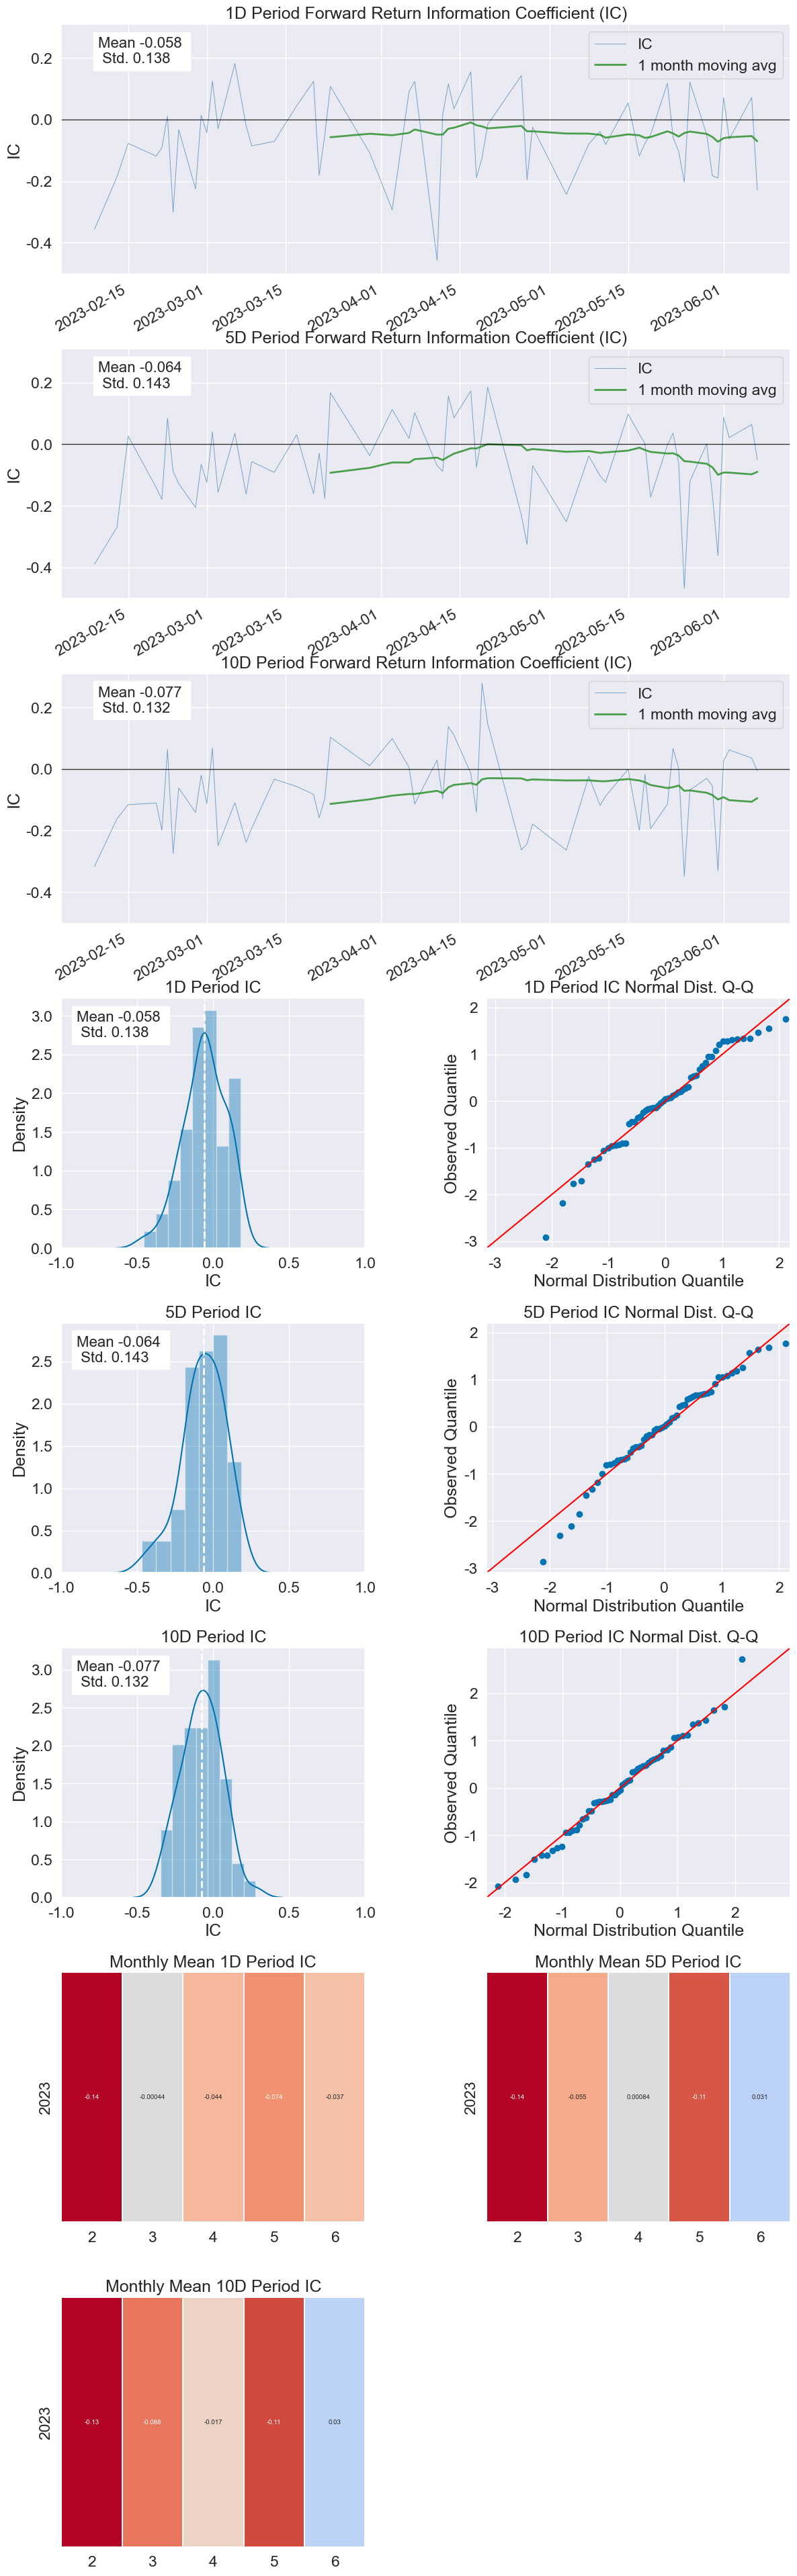

Turnover Analysis


/home/disk1/quanttopian/alphalens/alphalens/utils.py:910: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(
/home/disk1/quanttopian/alphalens/alphalens/plotting.py:153: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for quantile, p_data in quantile_turnover[period].iteritems():
/home/disk1/quanttopian/alphalens/alphalens/plotting.py:153: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for quantile, p_data in quantile_turnover[period].iteritems():
/home/disk1/quanttopian/alphalens/alphalens/plotting.py:153: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for quantile, p_data in quantile_turnover[period].iteritems():
/home/disk1/quanttopian/alphalens/alphalens/plotting.py:157: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for period

1D     5D    10D
Quantile 1.0 Mean Turnover   0.461  0.453  0.458
Quantile 2.0 Mean Turnover   0.642  0.656  0.649
Quantile 3.0 Mean Turnover   0.640  0.633  0.642
Quantile 4.0 Mean Turnover   0.588  0.611  0.609

1D     5D    10D
Mean Factor Rank Autocorrelation  0.241  0.236  0.231

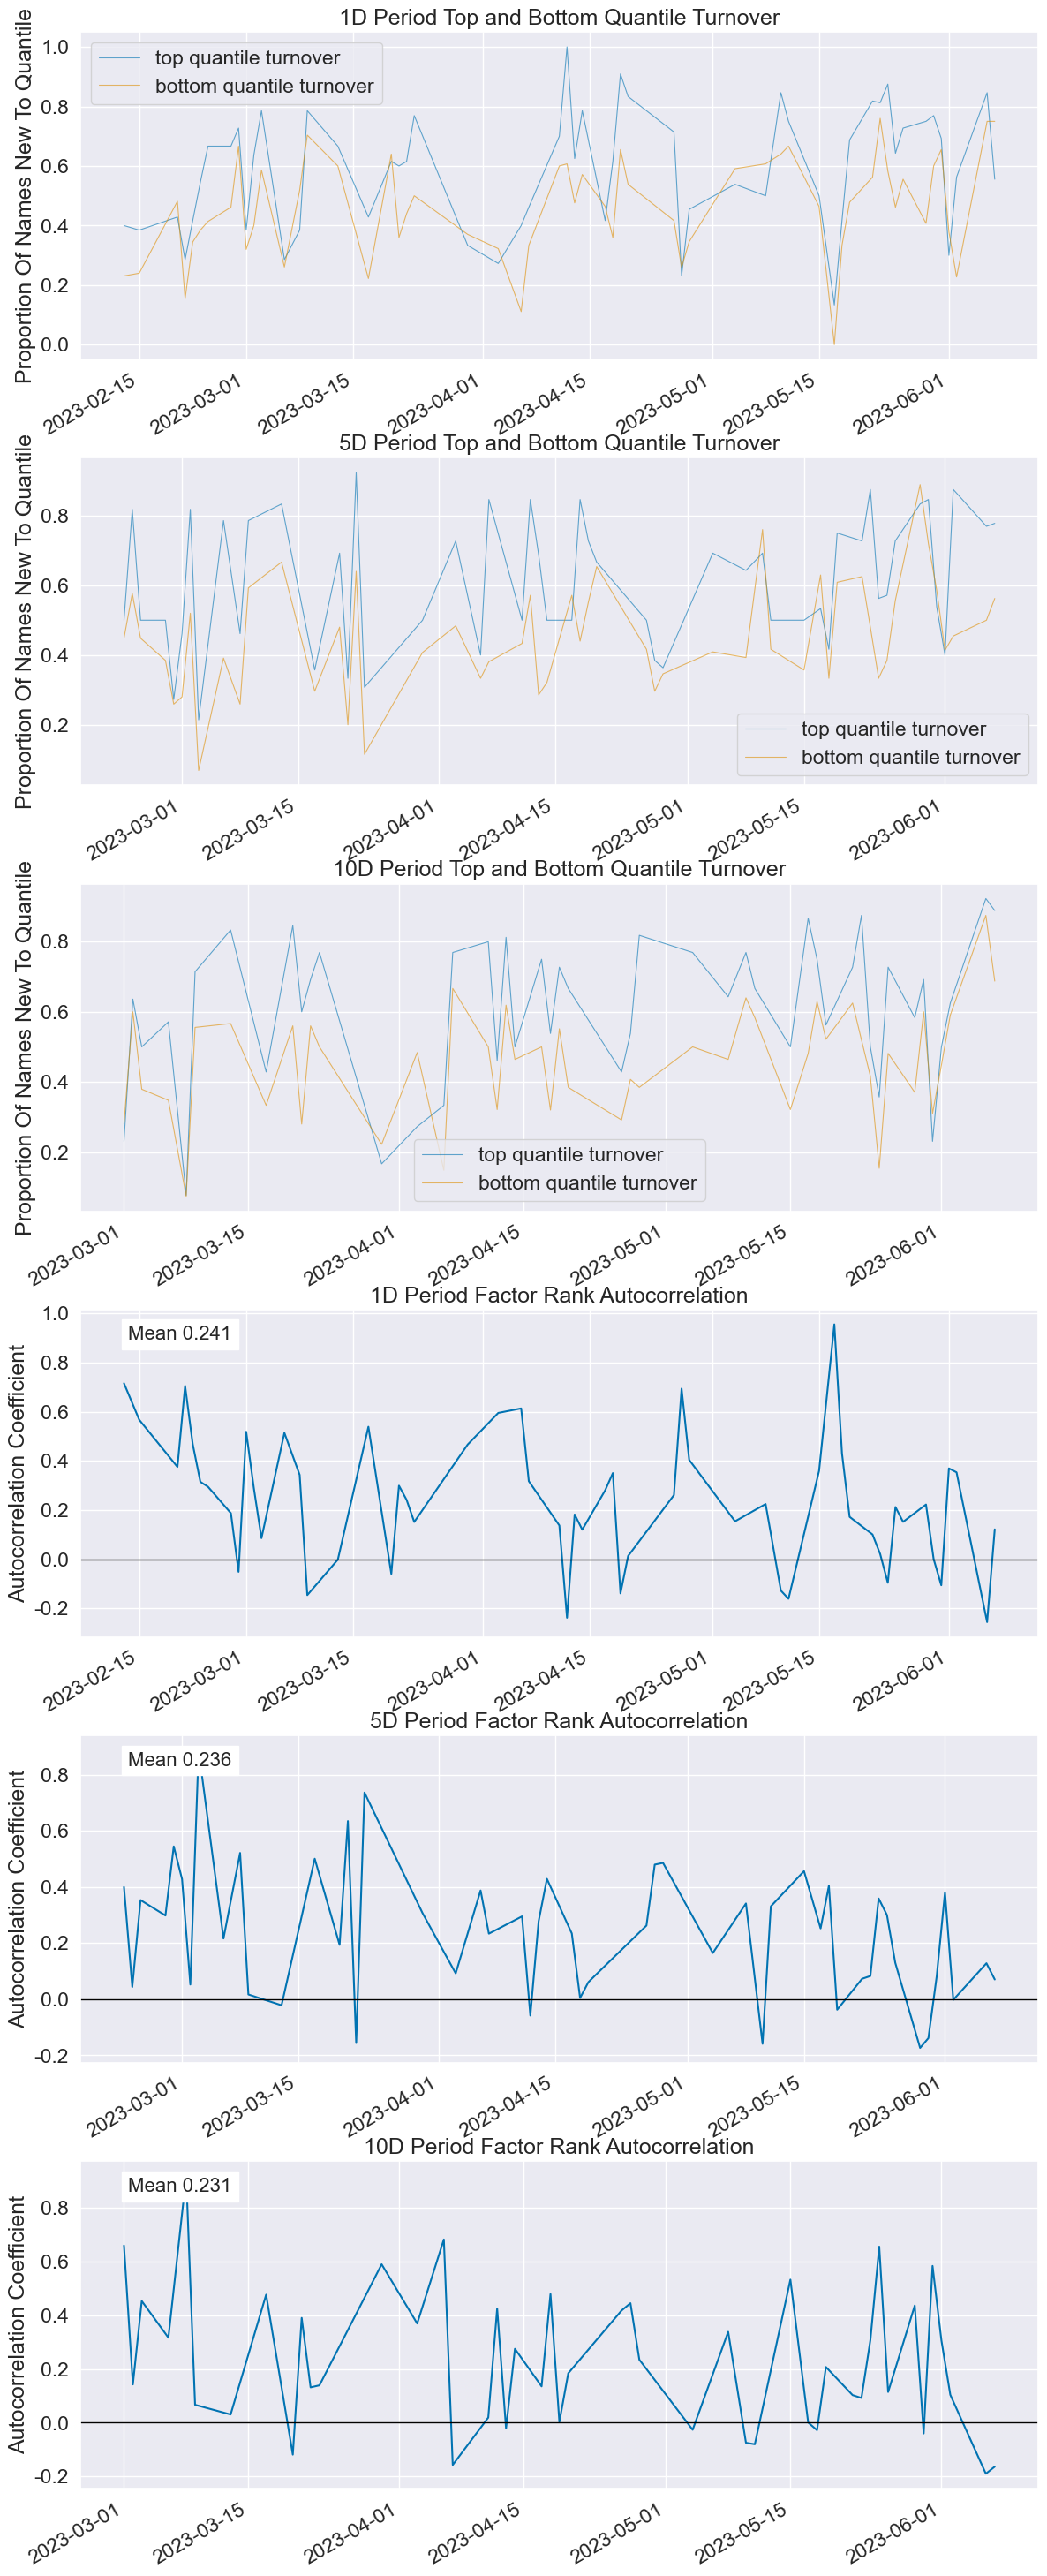

In [5]:
create_full_tear_sheet(factor_data, long_short=False, group_neutral=False, by_group=False)

In [ ]:
create_event_returns_tear_sheet(factor_data, prices, avgretplot=(3, 11),
                                long_short=False, group_neutral=False, by_group=False)

Quantiles Statistics


min       max      mean       std  count    count %
factor_quantile                                                          
1.0             -0.379756 -0.157200 -0.270846  0.111292   1410  42.896258
2.0              0.000000  0.033224  0.031694  0.006969    608  18.497110
3.0              0.033224  0.208083  0.206001  0.018981    588  17.888652
4.0              0.208083  0.397506  0.395559  0.019120    681  20.717980

Returns Analysis


/home/disk1/quanttopian/alphalens/alphalens/performance.py:199: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  weights = factor_data.groupby(grouper)['factor'] \
/home/disk1/quanttopian/alphalens/alphalens/plotting.py:138: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  returns_table = returns_table.append(alpha_beta)


1D      5D     10D
Ann. alpha                                    -0.111  -0.157  -0.098
beta                                           0.014  -0.085   0.052
Mean Period Wise Return Top Quantile (bps)    -8.944 -10.875  -8.367
Mean Period Wise Return Bottom Quantile (bps) -0.466   2.846   2.842
Mean Period Wise Spread (bps)                 -8.479 -13.784 -11.293

/home/disk1/quanttopian/alphalens/alphalens/plotting.py:810: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.axhline(1.0, linestyle='-', color='black', lw=1)
/home/disk1/quanttopian/alphalens/alphalens/plotting.py:502: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (i, a), (name, fr_column) in zip(enumerate(ax),


<Figure size 640x480 with 0 Axes>

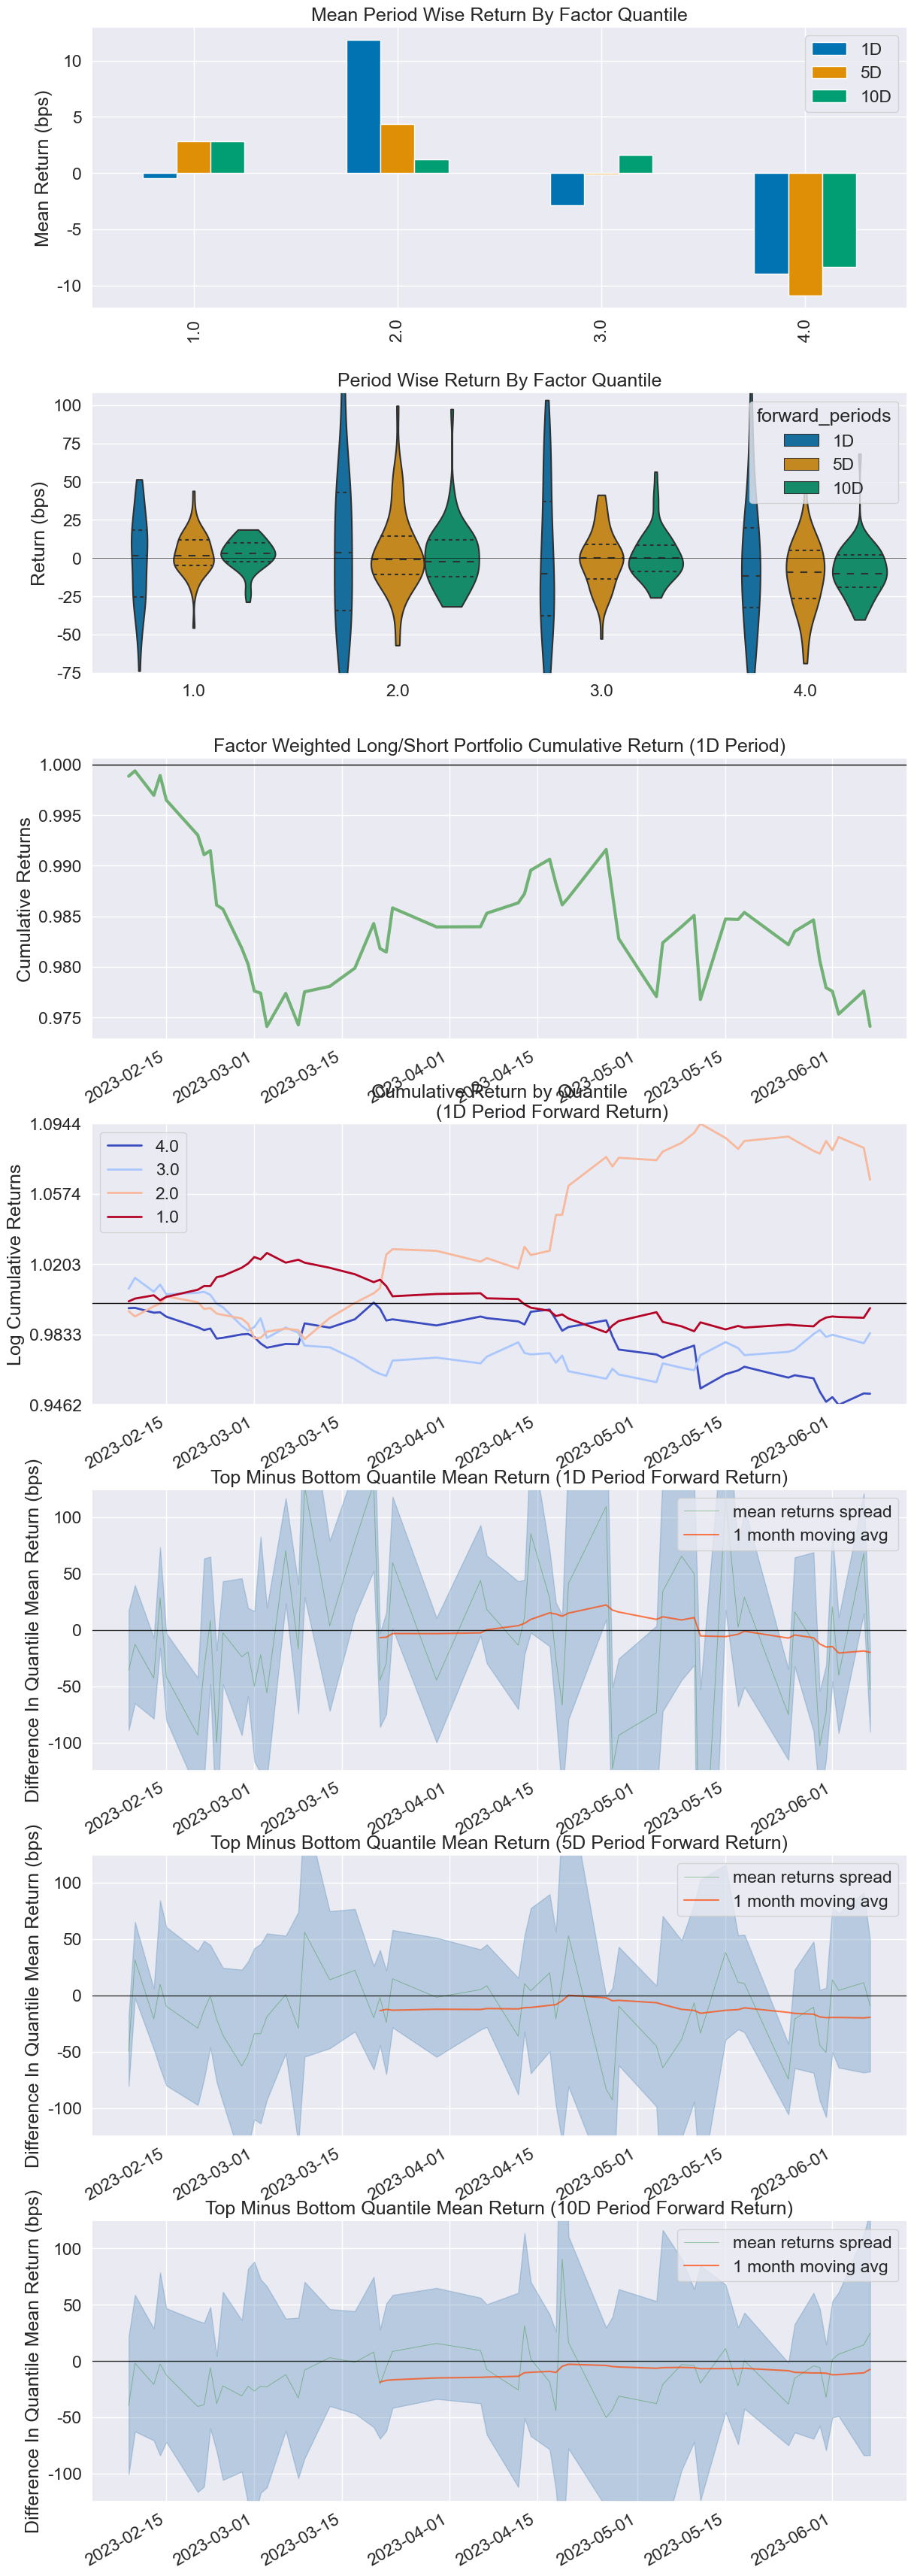

Information Analysis


1D     5D    10D
IC Mean          -0.044 -0.061 -0.070
IC Std.           0.135  0.148  0.132
Risk-Adjusted IC -0.321 -0.415 -0.529
t-stat(IC)       -2.361 -3.048 -3.888
p-value(IC)       0.022  0.004  0.000
IC Skew          -0.237 -0.318  0.237
IC Kurtosis      -0.670  0.654  0.589

/home/disk1/quanttopian/alphalens/alphalens/plotting.py:217: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for a, (period_num, ic) in zip(ax, ic.iteritems()):
/home/disk1/quanttopian/alphalens/alphalens/plotting.py:275: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for a, (period_num, ic) in zip(ax, ic.iteritems()):
/home/disk1/quanttopian/alphalens/alphalens/plotting.py:276: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ic.replace(np.nan, 0.), norm_hist=True, ax=a)
/home/disk1/quanttopian/alphalens/alphalens/plotting.py:276: User

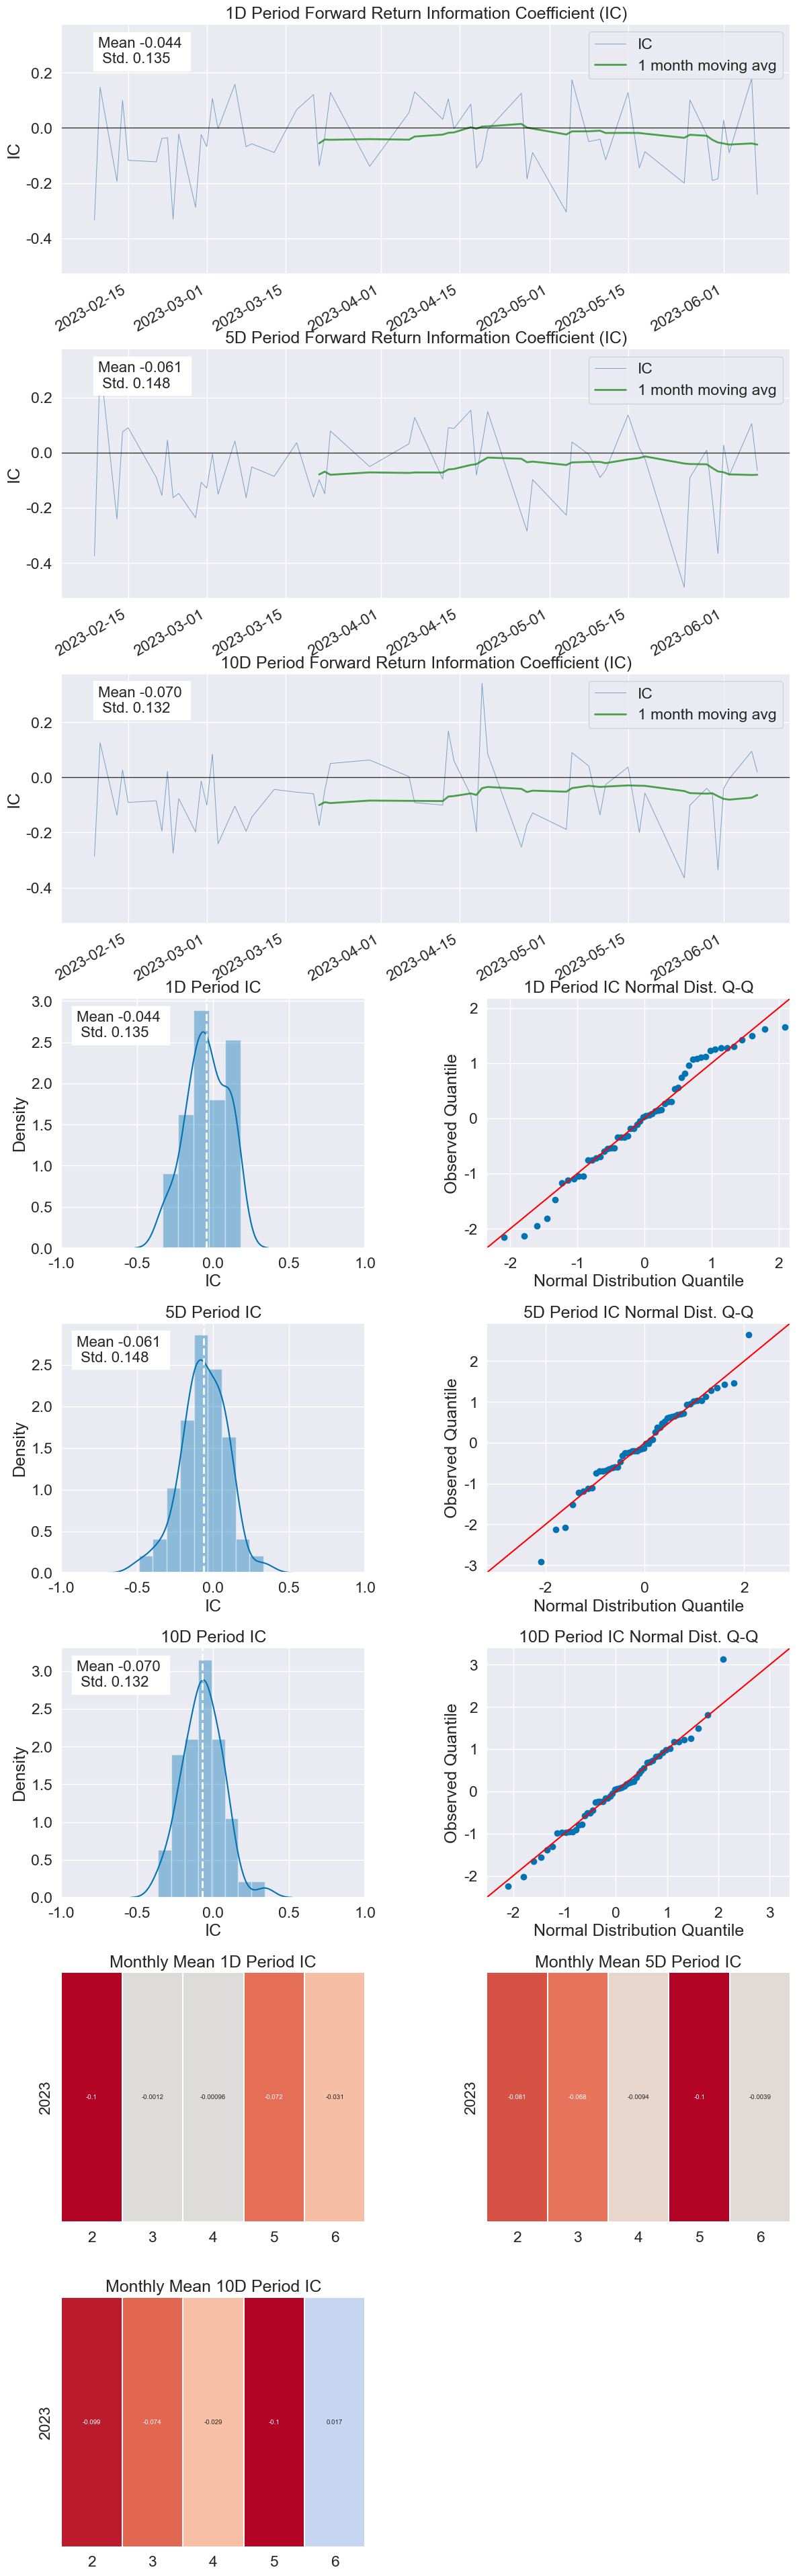

Turnover Analysis


/home/disk1/quanttopian/alphalens/alphalens/utils.py:910: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(
/home/disk1/quanttopian/alphalens/alphalens/plotting.py:153: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for quantile, p_data in quantile_turnover[period].iteritems():
/home/disk1/quanttopian/alphalens/alphalens/plotting.py:153: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for quantile, p_data in quantile_turnover[period].iteritems():
/home/disk1/quanttopian/alphalens/alphalens/plotting.py:153: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for quantile, p_data in quantile_turnover[period].iteritems():
/home/disk1/quanttopian/alphalens/alphalens/plotting.py:157: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for period

1D     5D    10D
Quantile 1.0 Mean Turnover   0.469  0.428  0.428
Quantile 2.0 Mean Turnover   0.657  0.615  0.607
Quantile 3.0 Mean Turnover   0.658  0.616  0.630
Quantile 4.0 Mean Turnover   0.607  0.577  0.592

1D     5D    10D
Mean Factor Rank Autocorrelation  0.213  0.281  0.265

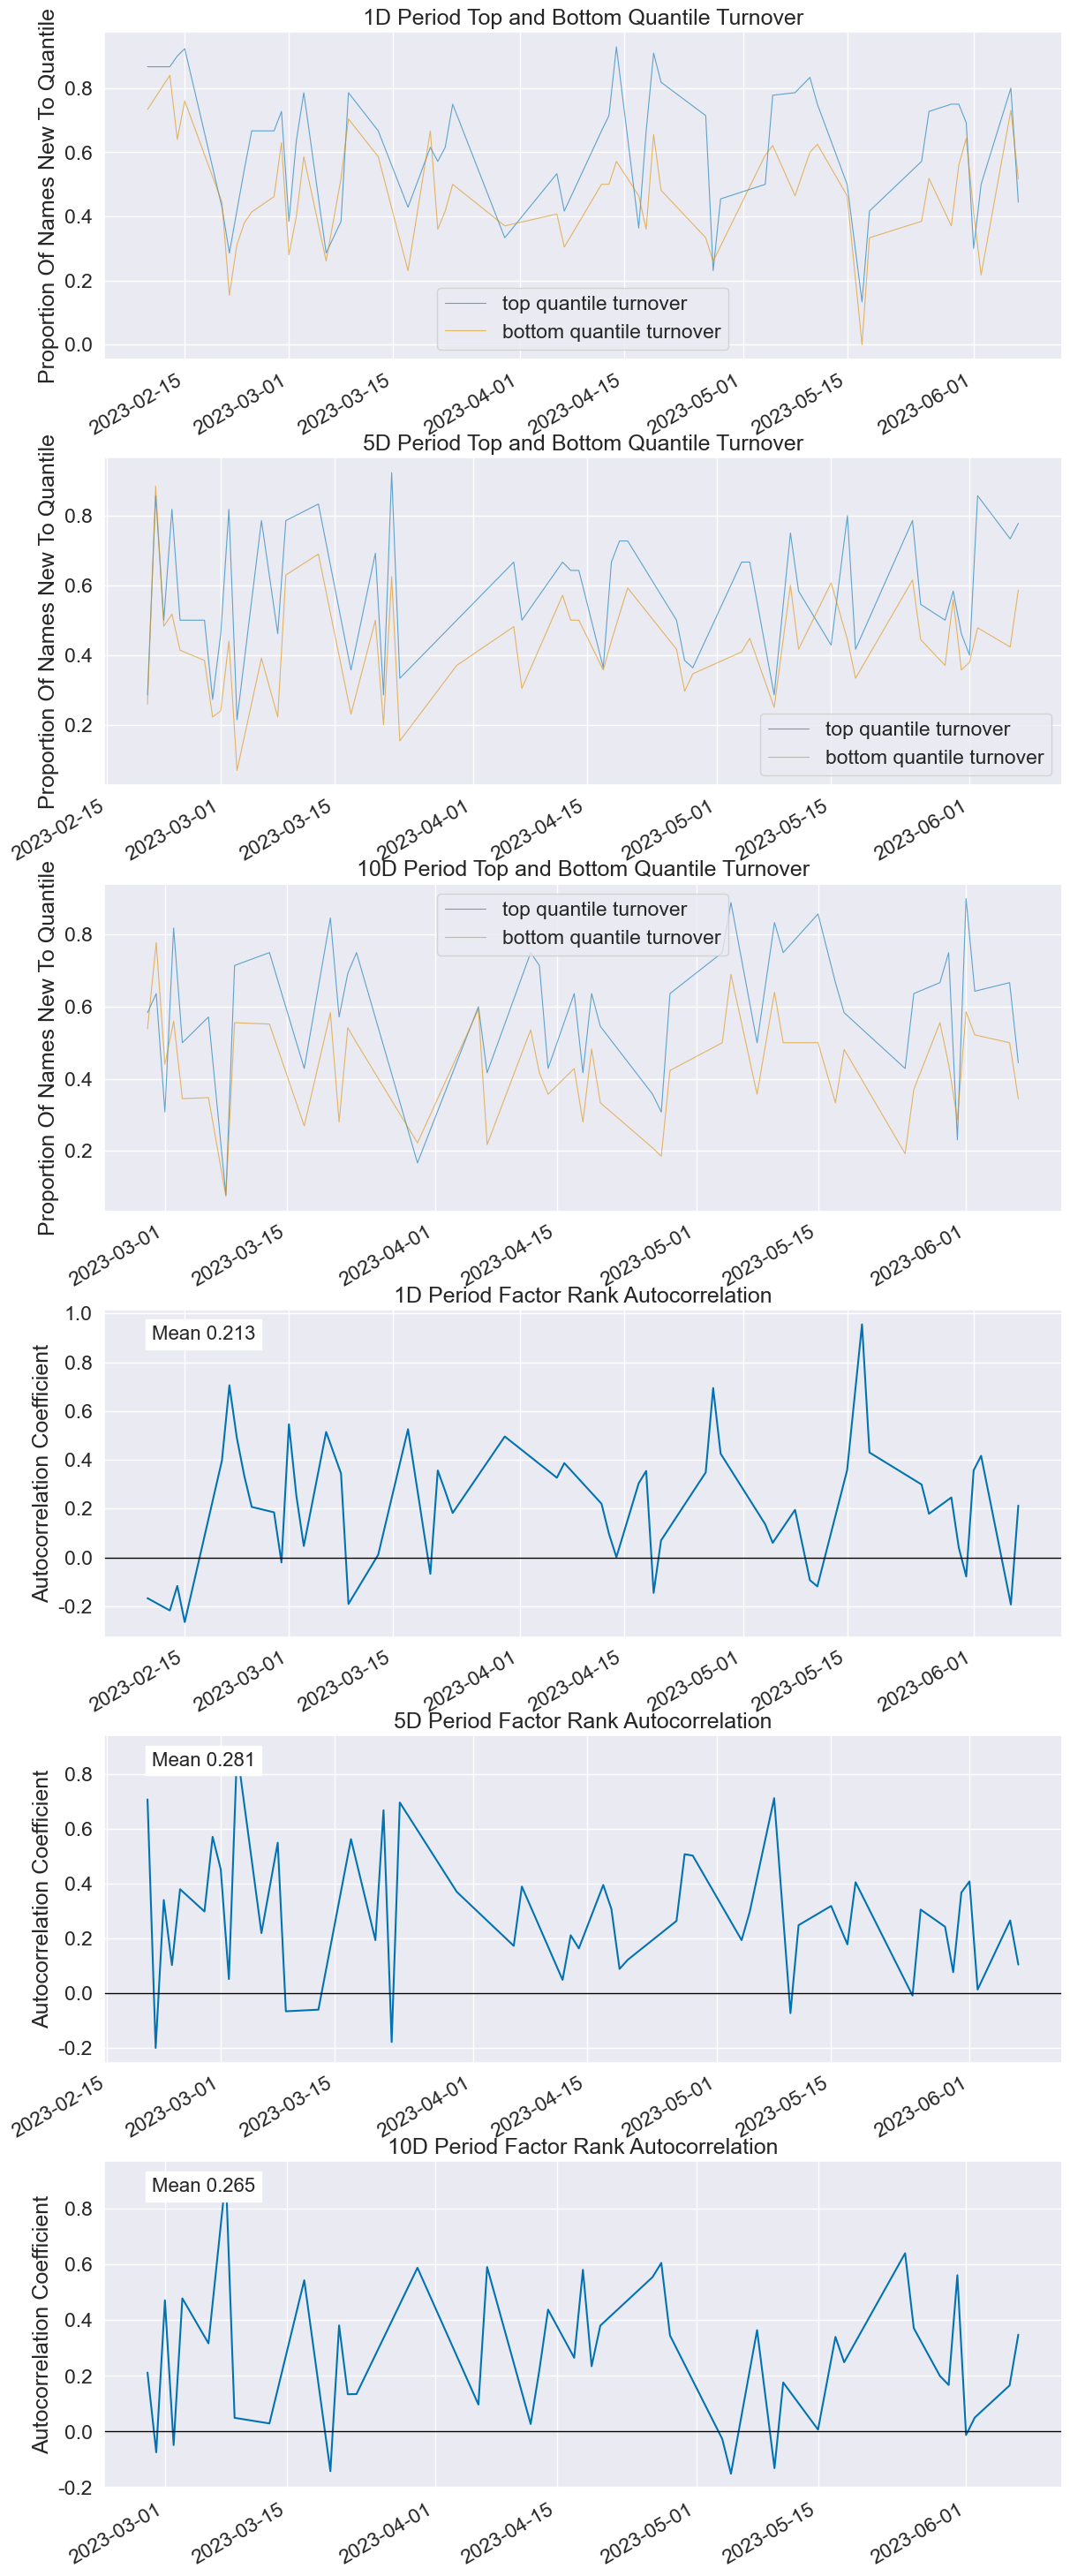

In [8]:
create_full_tear_sheet(factor_data, long_short=True, group_neutral=False, by_group=False)

/home/disk1/quanttopian/alphalens/alphalens/performance.py:712: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  series = returns.loc[returns.index[starting_index:ending_index],
/home/disk1/quanttopian/alphalens/alphalens/performance.py:712: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  series = returns.loc[returns.index[starting_index:ending_index],
/home/disk1/quanttopian/alphalens/alphalens/performance.py:712: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  series = returns.loc[returns.index[starting_index:ending_index],
/home/disk1/quanttopian/alphalens/alphalens/performance.py:712: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  series = returns.loc[returns.index[starting_index:ending_index],
/home/disk1/quanttopian/

<Figure size 640x480 with 0 Axes>

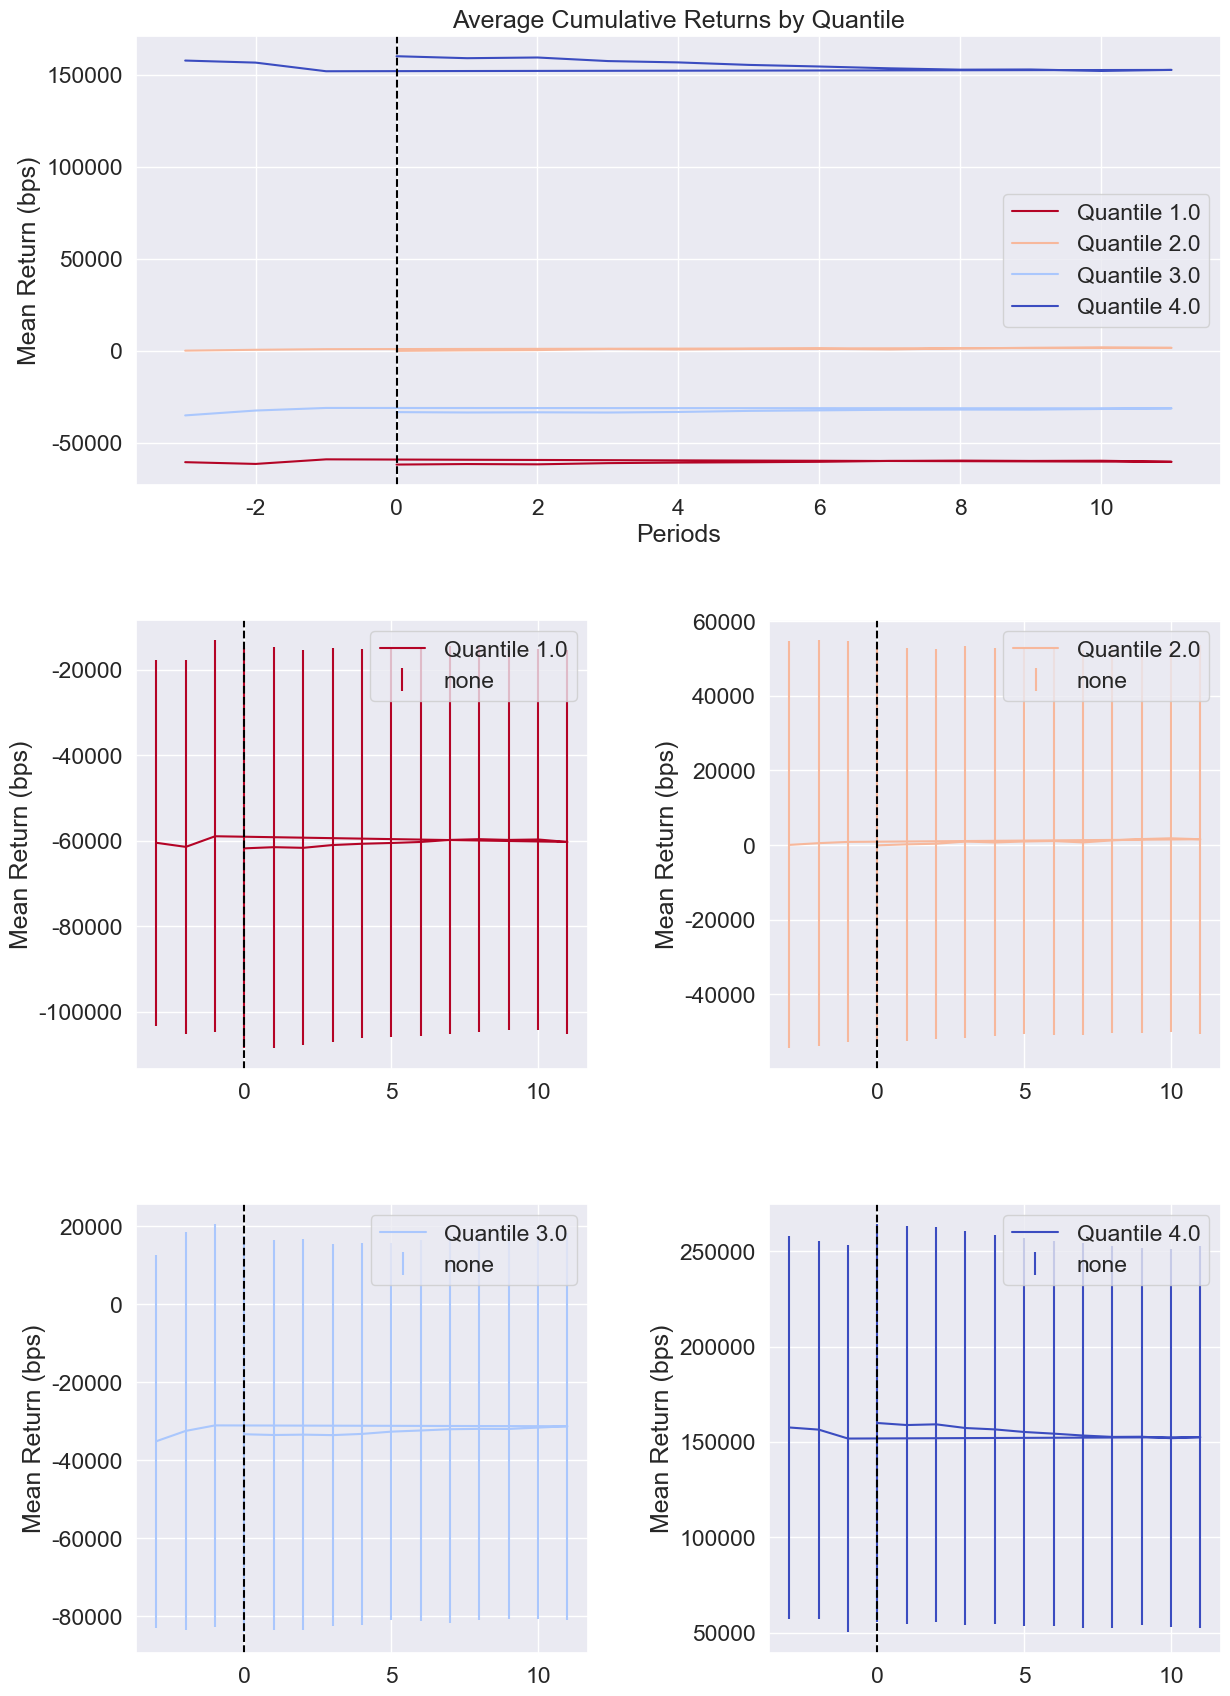

In [9]:
create_event_returns_tear_sheet(factor_data, prices, avgretplot=(3, 11),
                                long_short=True, group_neutral=False, by_group=False)